### Однофакторный дисперсионный анализ (ANOVA)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools
import scipy
import tqdm
from scipy import stats
import random

from IPython.display import *

Сгенерируем теоретическую генеральную совокупность.

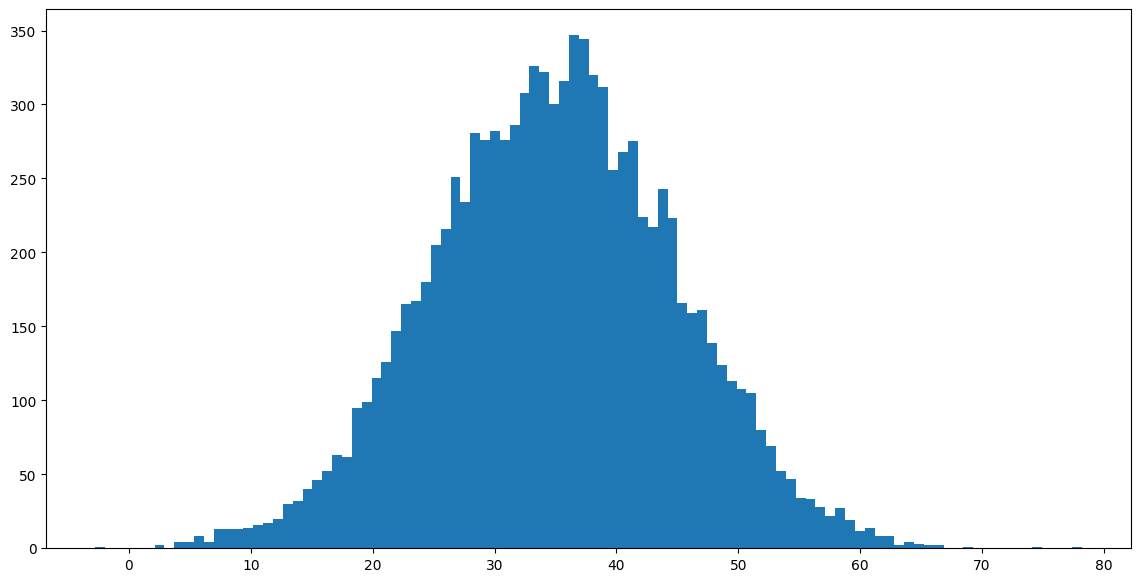

In [25]:
distrib = stats.norm(loc = 35, scale = 10)
gen_pop = distrib.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 100)
plt.show()

Извлечем из нашей совокупности 3 случайные подгруппы по 50 заказов в каждой - пусть это будут наблюдения, полученные в реальном эксперименте.

In [26]:
np.random.seed(3106)
sample_groups = []
for i in range(3):
    sample_groups.append(np.random.choice(gen_pop, size = 50).astype(int))
sample_groups = np.array(sample_groups)
sample_groups

array([[25, 33, 43, 36, 26, 46, 40, 38, 45, 19, 36, 25, 20, 16, 37, 32,
        18, 22, 46, 41, 50, 39, 54, 42, 26, 44, 29, 30, 36, 26, 25, 20,
        35, 41, 40, 31, 32, 27, 28, 50, 25, 44, 43, 45, 27, 38, 31, 27,
        30, 21],
       [48, 41, 43,  9, 16, 37, 29, 25, 21, 59, 35, 36, 38, 37, 21, 25,
        32, 34, 36, 25, 16, 25, 28, 38, 48, 45, 44, 31, 23, 23, 24, 16,
        22, 22, 27, 27, 37, 39, 37, 41, 24, 29, 49, 30, 34, 33, 39, 45,
        23, 34],
       [33, 45, 40, 51, 28, 41, 25, 35, 22, 55, 44, 28, 42, 36, 24, 32,
        38, 41, 34, 25, 27, 39, 31, 22, 41, 37, 34, 34, 41, 24, 37, 30,
        36, 35, 46, 26, 37, 28, 51, 39, 31, 48, 31, 29, 41, 50, 33, 41,
        31, 31]])

Рассчитаем:
- среднее каждой выборки и стандартное отклонение (голубые линии на графике)
- среднее средних и стандартное отклонение средних (оранжевая линия на графике)

[33.6 32.  35.6]
[0 1 2]
[ 9.38296328 10.01399021  7.9598995 ]


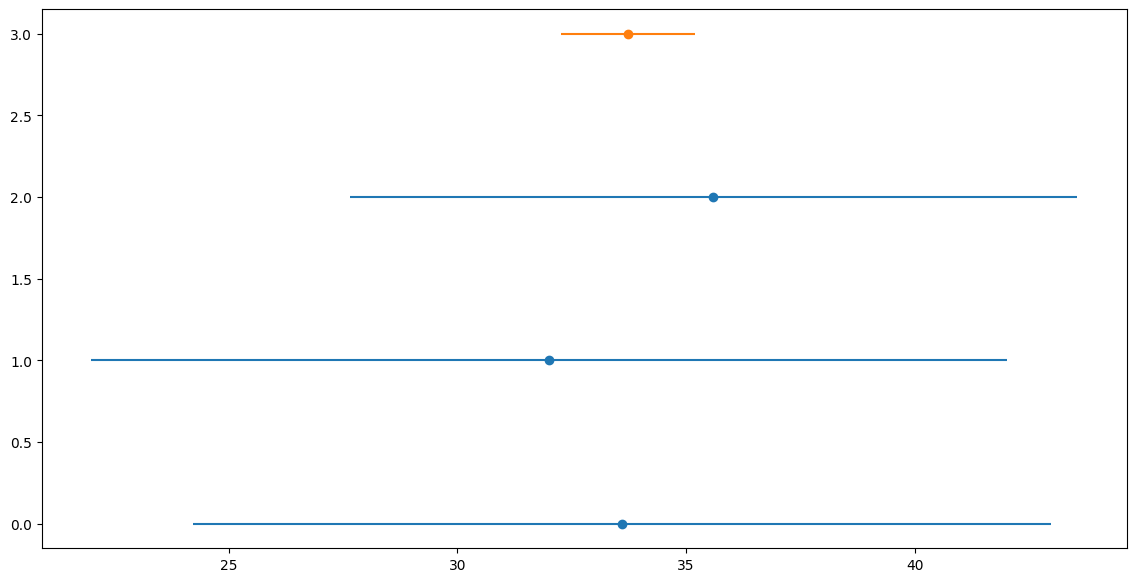

In [31]:
x = np.mean(sample_groups,axis = 1)
y = np.arange(sample_groups.shape[0])
e = np.std(sample_groups,axis = 1)

fig = plt.figure(figsize=(14, 7))
plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')
plt.errorbar( np.mean(x), y.shape[0] ,xerr =  np.std(x), linestyle='None', marker='o')
print(x)
print(y)
print(e)
plt.show()

**1)	формулируются гипотезы Н0 и Н1;**


H0 - выборки взяты из одного распределения (средние всех выборок равны)

H1 - выборки взяты из разных распределений (хотя бы пара средних различается между собой)

**2)	фиксируется уровень значимости критерия значимости**

Зададим α на уровне значимости 5%.

**3)выбирается статистический критерий для проверки гипотезы;**

Будем использовать ANOVA.

**4) по выборочным данным вычисляется значение K-наблюдаемое по распределению выбранной статистики**

In [32]:
num_of_groups = sample_groups.shape[0]

In [33]:
#Рассчитаем среднее по всем наблюдениям:
X_mean = sample_groups.mean()
X_mean

33.733333333333334

In [34]:
# Рассчитаем среднее для каждой группы
group_means = sample_groups.mean(axis = 1)
print(group_means)
group_means_reshaped = group_means.reshape(num_of_groups, 1)
print(group_means_reshaped)

[33.6 32.  35.6]
[[33.6]
 [32. ]
 [35.6]]


In [46]:
# SSW - Внутригрупповая вариация - Sum of Squares Within Groups
# SSB - Sum of Squares Between
# эта вариация характеризует разброс с. в., вызванный воздействием неконтролируемых остаточных факторов.
# S2b — это межгрупповая дисперсия, и S2w — внутригрупповая дисперсия

SSW  = np.sum((sample_groups  - group_means_reshaped)**2)
SSW
# print(sample_groups  - group_means_reshaped)

12584.0

In [54]:
# SSB
group_lengths = [x.shape[0] for x in sample_groups]

SSB  = np.sum((group_means - X_mean)**2 * group_lengths)
SSB
# print(group_means - X_mean)

325.3333333333336

In [55]:
# F
m = num_of_groups
N = np.sum(group_lengths)

F = (SSB/(m-1))/(SSW/(N-m))
F

1.900190718372538

Воспользуемся пакетом stats для аналогичного расчета:

In [56]:
F, p = stats.f_oneway(*sample_groups)

In [57]:
# F-наблюдаемое
F

1.900190718372537

**5)	с учетом выбранного уровня значимости вычисляется критическая область и область принятия гипотезы, то есть находится K-критическое**

In [58]:
# F-критическое
F_critical = scipy.stats.f.ppf(q=1-.05, dfn = m, dfd = N - m)
F_critical

2.6661487758521765

**6)	найденное значение K-наблюдаемое критерия сравнивается с K-критическое и по результатам сравнения делается вывод**

In [59]:
F < F_critical

True

**Вывод**: Мы не можем отвергнуть гипотезу H0

In [60]:
p

0.15319505983888262

In [63]:
p > 0.05

True

Теперь давайте попробуем разобраться, откуда взялось распределение F, с которым мы работали.

Будем из нашей генеральной совокупности извлекать выборки и считать F. Выборки будут также размером 50 и количество выборок будет равно 3, то есть по аналогии с тем же дизайном эксперимента, который мы проводили выше.

In [21]:
def calculate_random_sample_group(sz = 50):
    sample_groups = []
    for i in range(num_of_groups):
        sample_groups.append(np.random.choice(gen_pop,  size = sz))
    F, _ = stats.f_oneway(*sample_groups)    
    return sample_groups, F

Fs = []
sgs = []
for i in tqdm.tqdm(range(10000)):
    sg,F = calculate_random_sample_group()
    Fs.append(F)
    sgs.append(sg)

100%|██████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2063.07it/s]


Распределение приняло опредленную форму, такое распредление называется распредление Фишера, на основе рассчитанных статистик по нему мы как раз и принимали решения.

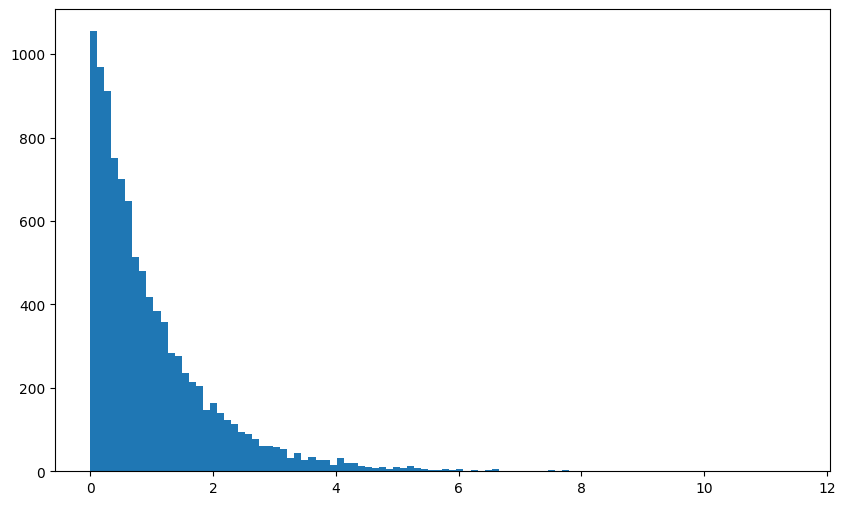

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(Fs,bins = 100)
plt.show()